# Phase space 

In [51]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.collections import LineCollection  # for color coded trajectories
import matplotlib as mpl

from numpy import linalg as LA

%matplotlib inline
rcParams['figure.figsize'] = 10,10
rcParams['text.usetex'] = True

label_size = 25
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

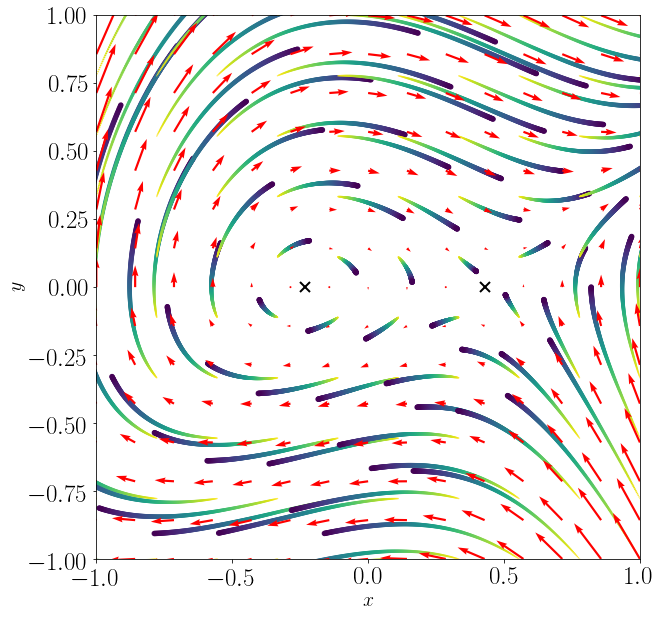

In [62]:
def Bogdanov_Takens(x, t, beta1, beta2):
    
    x1, x2 = x
    dxdt = [x2, beta1 + beta2*x1 + x1**2 - x1*x2]

    return dxdt

def plot_color_coded_traj(xTraj):
    
    x = xTraj[:,0]
    y = xTraj[:,1]

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=plt.get_cmap('viridis'),
                        norm=plt.Normalize(t[0], t[-1]))
    lc.set_array(t)
    lc.set_linewidth(5)

    fig = plt.figure()
#     plt.figure(figsize=(15,9))
    trajC = plt.gca().add_collection(lc)
    cbar = plt.colorbar(trajC)
    plt.show()    
    

def plt_sample_ps_pts_v1(t, beta1, beta2):

    x1vec = np.linspace(-1, 1, 15)
    x2vec = np.linspace(-1, 1, 15)

    plt.figure()
#     plt.figure(figsize=(15,10))
    for i in x1vec:
        for j in x2vec:
            x0 = [i,j]
            xTraj = odeint(Bogdanov_Takens, x0, t, args=(beta1, beta2))
#             plt.plot(xTraj[:,0],xTraj[:,1])
            x = xTraj[:,0]
            y = xTraj[:,1]

            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap=plt.get_cmap('viridis'),
                                norm=plt.Normalize(t[0], t[-1]))
            lc.set_array(t)
            lc.set_linewidth(5)
            trajC = plt.gca().add_collection(lc)
            
            
    plt.xlabel('$x$',fontsize=20)
    plt.ylabel('$y$',fontsize=20)
    plt.axes().set_aspect('equal')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    cbar = plt.colorbar(trajC)
    
def plt_sample_ps_pts(t, beta1, beta2):
    
    
    x1vec = np.linspace(-1, 1, 10)
    x2vec = np.linspace(-1, 1, 10)

    plt.figure()
    for i in x1vec:
        for j in x2vec:
            x0 = [i,j]
            xTraj = odeint(Bogdanov_Takens, x0, t, args=(beta1, beta2))
            x = xTraj[:,0]
            y = xTraj[:,1]
        
            burstLen = np.size(xTraj,0)
            scale = np.arange(1, burstLen)/10
            colors = np.arange(burstLen)
#             plt.scatter(x, y, s=scale, c=[0.5,0.5,0.5], alpha=0.1)
#             plt.scatter(x, y, s=scale, c=colors, cmap='gray_r')
            plt.scatter(x, y, s=scale, c=colors, cmap='viridis_r')


    plt.xlabel('$x$',fontsize=20)
    plt.ylabel('$y$',fontsize=20)
    plt.axes().set_aspect('equal')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
#     plt.colorbar()
            
            
def plt_vecf(t, beta1, beta2):
    
    x1vec = np.linspace(-1, 1, 15)
    x2vec = np.linspace(-1, 1, 15)
    x1mesh, x2mesh = np.meshgrid(x1vec, x2vec)
    
    u, v = Bogdanov_Takens(x=np.array([x1mesh, x2mesh]), t = t, 
                           beta1=beta1, 
                           beta2=beta2)
    plt.quiver(x1vec, x2vec, u, v, color='red')
    

beta1 = -0.1
beta2 = -0.2
t = np.linspace(0, 0.8, 200)

plt_sample_ps_pts(t, beta1, beta2)

plt_vecf(t, beta1, beta2)


beta1 = -0.1
beta2 = -0.2
xEqP = (-beta2 + np.sqrt(beta2**2 - 4*beta1))/2
xEqM = (-beta2 - np.sqrt(beta2**2 - 4*beta1))/2
plt.plot(xEqP,0,'xk',xEqM,0,'xk',ms=10,mew=2)

t = np.arange(0, 3.004, 0.004)
x0 = [0, 0.4]
xTraj = odeint(Bogdanov_Takens, x0, t, args=(beta1, beta2))

# plt.figure()
# plt.plot(xTraj[:,0], xTraj[:,1])

# plot_color_coded_traj(xTraj)

## printing figure
# plt.savefig('pp_fig2_n1e-1_n2e-1.pdf')
plt.savefig('ps_fig2_n1e-1_n2e-1.png',dpi=300)

## Equilibrium solutions

In [5]:
beta1 = -0.1
beta2 = -0.2
xEqP = (-beta2 + np.sqrt(beta2**2 - 4*beta1))/2
xEqM = (-beta2 - np.sqrt(beta2**2 - 4*beta1))/2
print(xEqP, xEqM)

jac_xeqp = [[0, 1],[beta2 + 2*xEqP, -xEqP]] 
jac_xeqm = [[0, 1],[beta2 + 2*xEqM, -xEqM]] 
vals, vecs = LA.eig(jac_xeqp)
print(vals, vecs)
vals, vecs = LA.eig(jac_xeqm)
print(vals, vecs)

0.431662479036 -0.231662479036
[ 0.62672919 -1.05839167] [[ 0.84733913 -0.68677157]
 [ 0.53105217  0.72687331]]
[ 0.11583124+0.80616877j  0.11583124-0.80616877j] [[ 0.77537438+0.j          0.77537438-0.j        ]
 [ 0.08981258+0.62508261j  0.08981258-0.62508261j]]
